# **Portuguese Bank Telemarketing campaign**

#  **Dataset description**
     bank client data:
   1 - age (numeric) 
   
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services") 
   
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   
   5 - default: has credit in default? (binary: "yes","no")
   
   6 - balance: average yearly balance, in euros (numeric)
   
   7 - housing: has housing loan? (binary: "yes","no")
   
   8 - loan: has personal loan? (binary: "yes","no")
   
    related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
   
  10 - day: last contact day of the month (numeric)
  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  
  12 - duration: last contact duration, in seconds (numeric)
  
    other attributes:
   
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

# **Importing Libiraries**

In [129]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import warnings
warnings.filterwarnings('ignore')


In [8]:
data = pd.read_csv("bank-full.csv",sep=";")

# <b>Exploring Data</b>

In [189]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [190]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [191]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [192]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [193]:
data.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [194]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### **check for missing values**

In [196]:
data.isnull().sum()

#there are no missing values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [197]:
data.shape

(45211, 17)

In [198]:
#the total count of values in the poutcome column
data['poutcome'].value_counts()

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

In [10]:
# As there are more "unknown" and "others" values 
# Droping the 'poutcome' column from the dataset
data = data.drop(columns=['poutcome'])

In [200]:
data['contact'].value_counts()

contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

In [12]:
#  So we will Drop the row with index 4
data = data[data['contact'] != 'unknown']

# <b>Preprocessing</b>

## Handling Outliers

<Axes: >

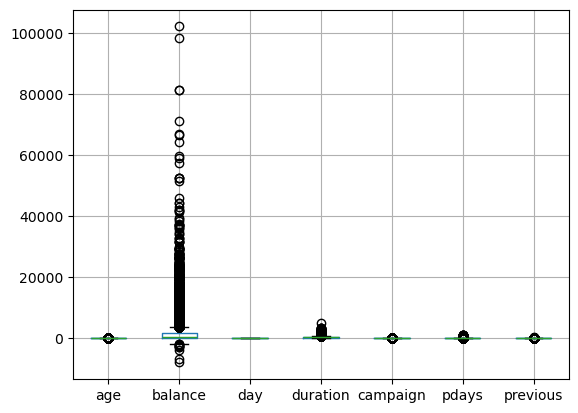

In [204]:
data.boxplot()

age            Axes(0.125,0.653529;0.227941x0.226471)
balance     Axes(0.398529,0.653529;0.227941x0.226471)
day         Axes(0.672059,0.653529;0.227941x0.226471)
duration       Axes(0.125,0.381765;0.227941x0.226471)
campaign    Axes(0.398529,0.381765;0.227941x0.226471)
pdays       Axes(0.672059,0.381765;0.227941x0.226471)
previous           Axes(0.125,0.11;0.227941x0.226471)
dtype: object

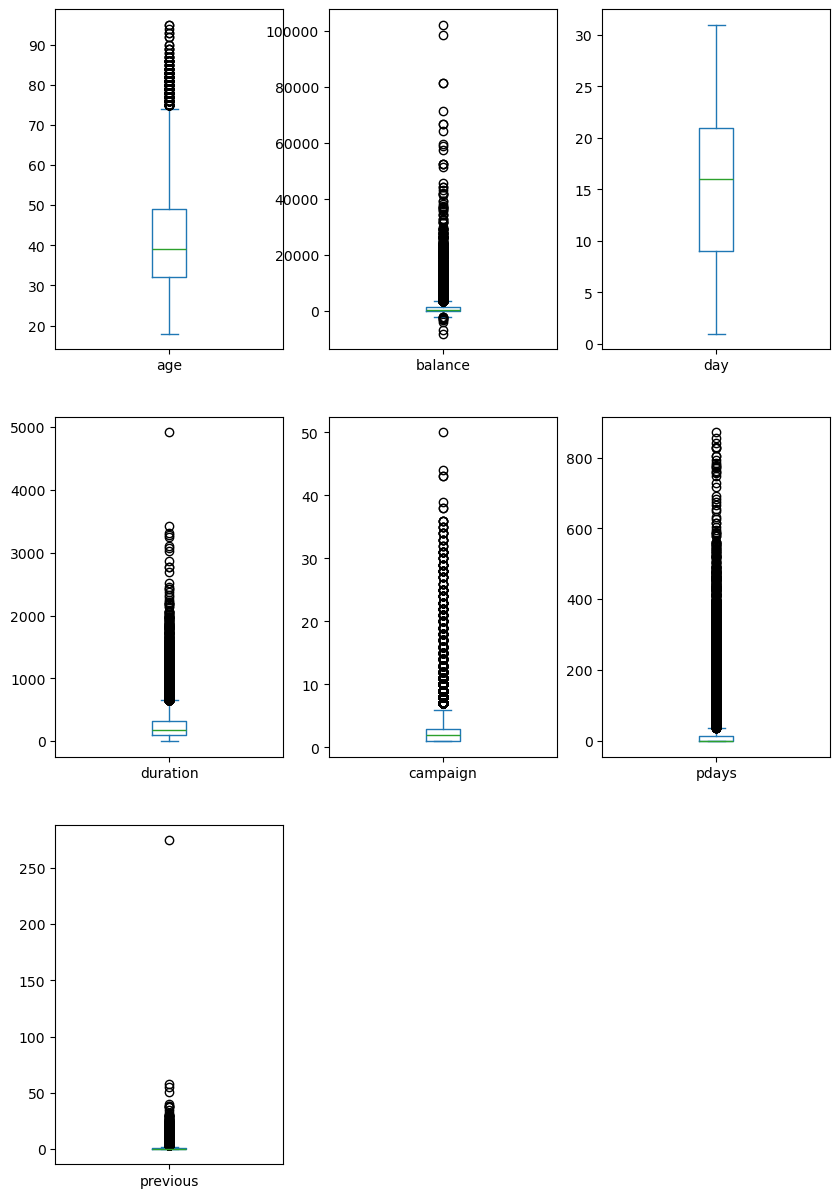

In [205]:
data.plot(kind="box", subplots=True, figsize=(10,15), layout=(3, 3))


In [14]:
Q1 = data['balance'].quantile(0.25)
Q3 = data['balance'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['balance'] < lower_bound) | (data['balance'] > upper_bound)]

In [16]:
data = data[(data['balance'] >= lower_bound) & (data['balance'] <= upper_bound)]

In [18]:
Q1 = data['campaign'].quantile(0.10)
Q3 = data['campaign'].quantile(0.90)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['campaign'] < lower_bound) | (data['campaign'] > upper_bound)]


In [20]:
data = data[(data['campaign'] >= lower_bound) & (data['campaign'] <= upper_bound)]

In [21]:
Q1 = data['duration'].quantile(0.20)
Q3 = data['duration'].quantile(0.80)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['duration'] < lower_bound) | (data['duration'] > upper_bound)]


In [24]:
data = data[(data['duration'] >= lower_bound) & (data['duration'] <= upper_bound)]

In [26]:
Q1 = data['previous'].quantile(0.05)
Q3 = data['previous'].quantile(0.95)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['previous'] < lower_bound) | (data['previous'] > upper_bound)]


In [28]:
data = data[(data['previous'] >= lower_bound) & (data['previous'] <= upper_bound)]

In [30]:
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['age'] < lower_bound) | (data['age'] > upper_bound)]


In [32]:
data = data[(data['age'] >= lower_bound) & (data['age'] <= upper_bound)]

age            Axes(0.125,0.653529;0.227941x0.226471)
balance     Axes(0.398529,0.653529;0.227941x0.226471)
day         Axes(0.672059,0.653529;0.227941x0.226471)
duration       Axes(0.125,0.381765;0.227941x0.226471)
campaign    Axes(0.398529,0.381765;0.227941x0.226471)
pdays       Axes(0.672059,0.381765;0.227941x0.226471)
previous           Axes(0.125,0.11;0.227941x0.226471)
dtype: object

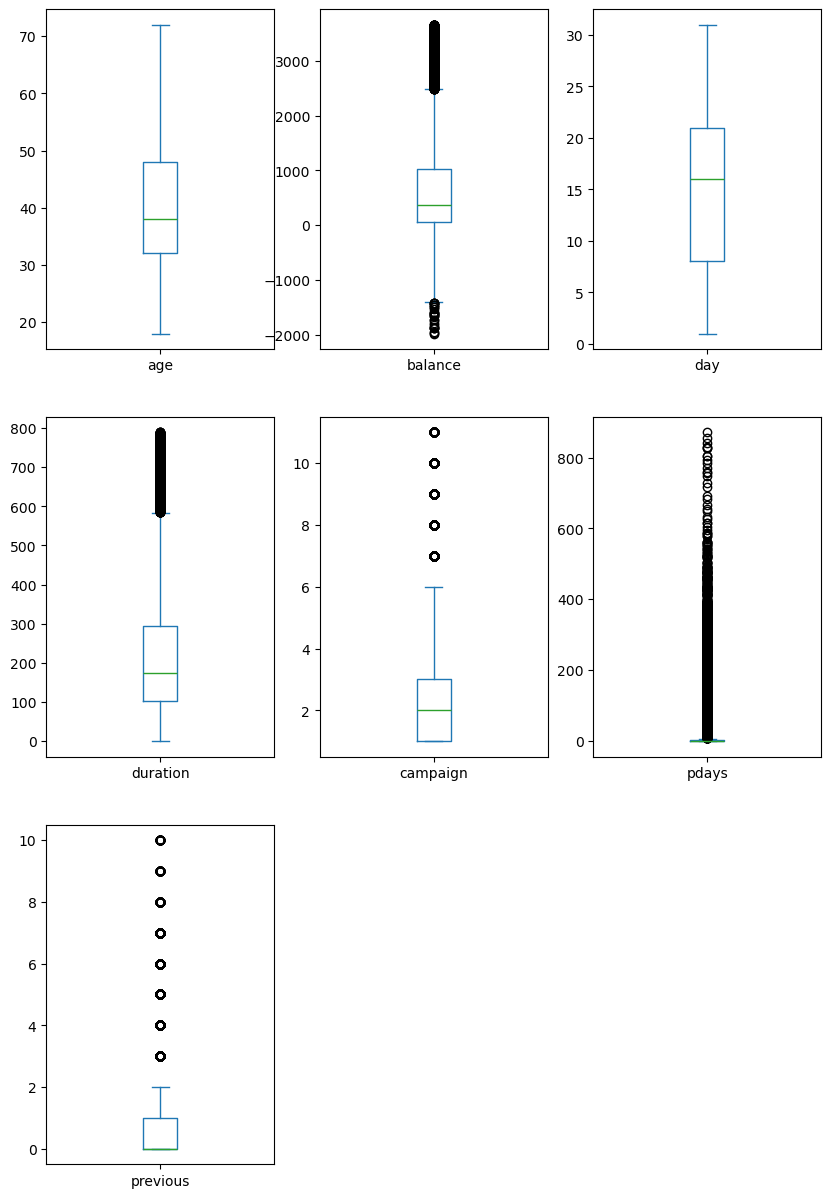

In [216]:
data.plot(kind="box", subplots=True, figsize=(10,15), layout=(3, 3))

In [34]:
data.shape

(26502, 16)

# <b>EDA</b>

In [36]:
data_numeric = data.select_dtypes(include='int')
data_category = data.select_dtypes(include='object')

## Univariate Analysis

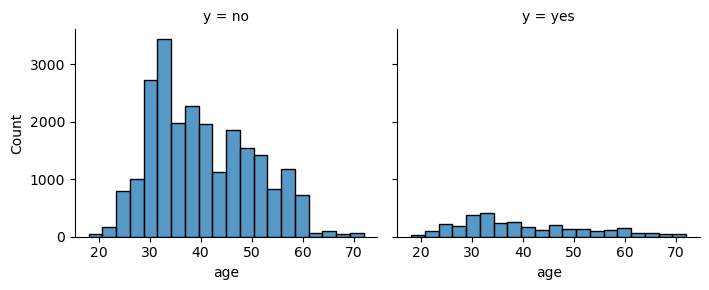

In [221]:
plot = sns.FacetGrid(col='y',data=data,height=3,aspect=1.2)
plot.map(sns.histplot,'age',bins=20)
plt.show()

<Axes: xlabel='age', ylabel='y'>

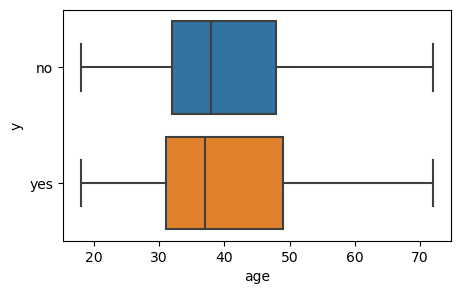

In [222]:
plt.figure(figsize=(5,3))
sns.boxplot(data=data,y='y',x='age')

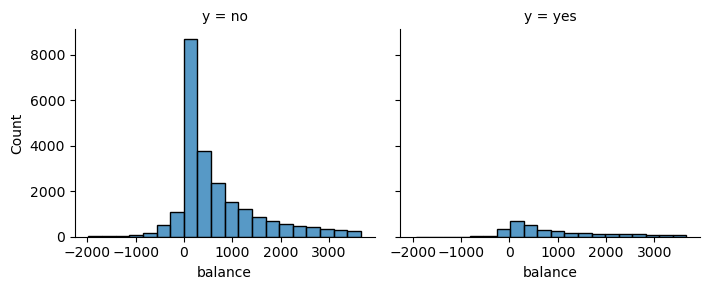

In [223]:
plot = sns.FacetGrid(col='y',data = data,height=3,aspect=1.2)
plot.map(sns.histplot,'balance',bins=20)
plt.show()

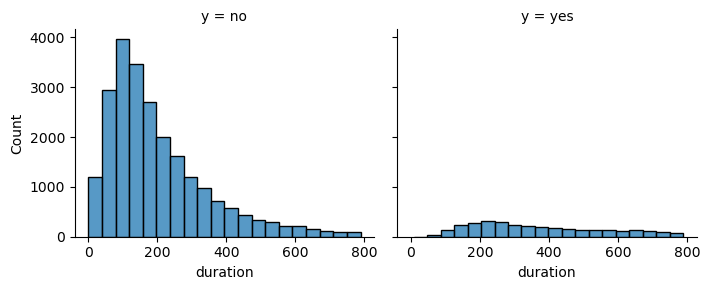

In [224]:
plot = sns.FacetGrid(col = 'y',data=data,height=3,aspect=1.2)
plot.map(sns.histplot,'duration',bins=20)
plt.show()

<Axes: xlabel='duration', ylabel='y'>

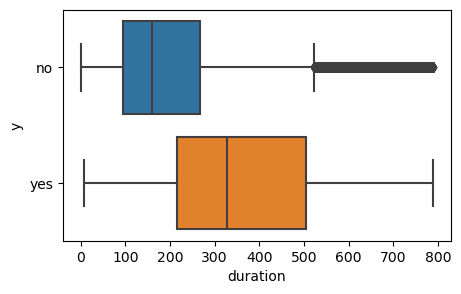

In [225]:
plt.figure(figsize=(5,3))
sns.boxplot(data=data,x='duration',y='y')

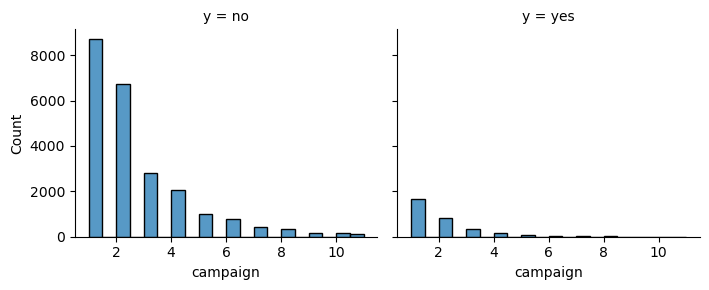

In [226]:
plot = sns.FacetGrid(col='y',data=data,height=3,aspect=1.2)
plot.map(sns.histplot,'campaign',bins=20)
plt.show()

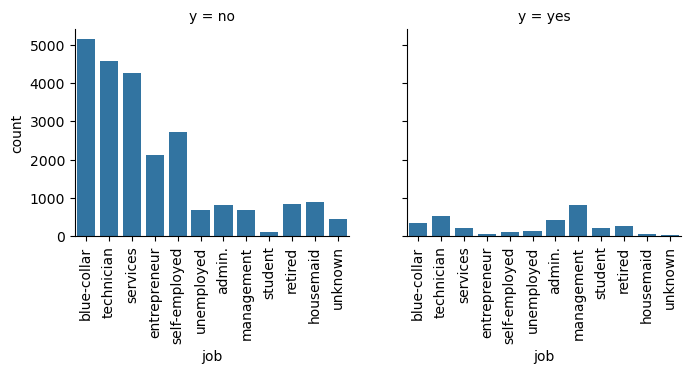

In [227]:
plot = sns.FacetGrid(data=data,col='y',height=3,aspect=1.2)
plot.map(sns.countplot,'job')
plot.set_xticklabels(rotation=90)
plt.show()

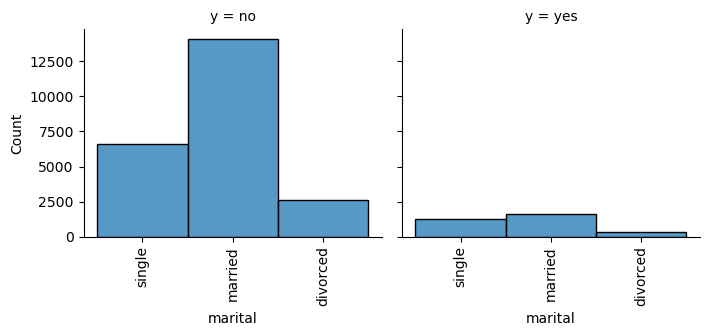

In [228]:
plot =  sns.FacetGrid(data=data,col='y',height=3,aspect=1.2)
plot.map(sns.histplot,'marital',bins=20)
plot.set_xticklabels(rotation=90)
plt.show()

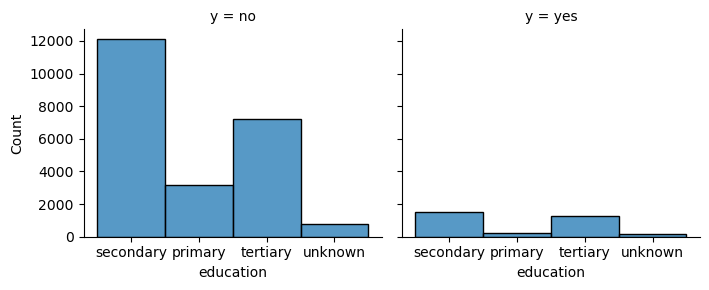

In [229]:
plot = sns.FacetGrid(data=data,col='y',height=3,aspect=1.2)
plot.map(sns.histplot,'education',bins=20)
plt.show()

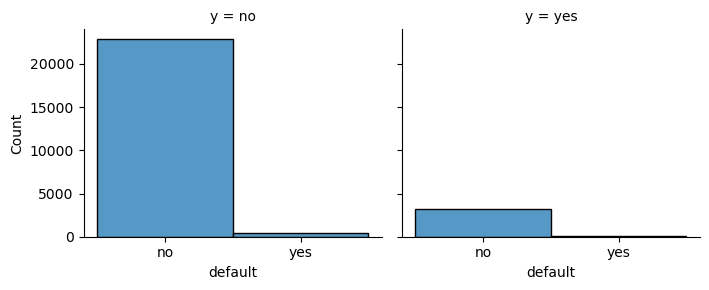

In [230]:
plot= sns.FacetGrid(data=data,col='y',height=3,aspect=1.2)
plot.map(sns.histplot,'default',bins=20)
plt.show()

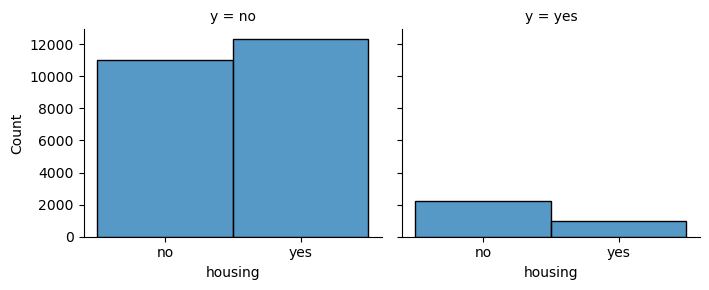

In [231]:
plot = sns.FacetGrid(data=data,col='y',height=3,aspect=1.2)
plot.map(sns.histplot,'housing',bins=20)
plt.show()

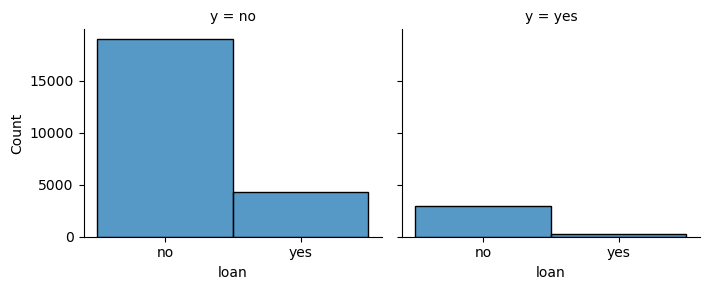

In [232]:
plot=sns.FacetGrid(data=data,col='y',height=3,aspect=1.2)
plot.map(sns.histplot,'loan',bins=20)
plt.show()

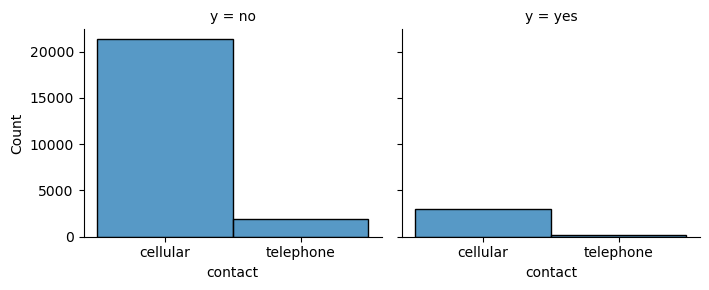

In [233]:
plot=sns.FacetGrid(data=data,col='y',height=3,aspect=1.2)
plot.map(sns.histplot,'contact',bins=20)
plt.show()

In [234]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26502 entries, 12657 to 45209
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        26502 non-null  int64 
 1   job        26502 non-null  object
 2   marital    26502 non-null  object
 3   education  26502 non-null  object
 4   default    26502 non-null  object
 5   balance    26502 non-null  int64 
 6   housing    26502 non-null  object
 7   loan       26502 non-null  object
 8   contact    26502 non-null  object
 9   day        26502 non-null  int64 
 10  month      26502 non-null  object
 11  duration   26502 non-null  int64 
 12  campaign   26502 non-null  int64 
 13  pdays      26502 non-null  int64 
 14  previous   26502 non-null  int64 
 15  y          26502 non-null  object
dtypes: int64(7), object(9)
memory usage: 3.4+ MB


<b> Potential Insights :</b> 
- Age : Younger demographic (age less than 40-50) have a higher chance to subscribe to a term deposit.
- Balance : Customers with a balance between 0 and 1000 are more likely to use a term deposit.
- Campaign : During the campaign to the customers with contact of 2 to 4 times have took subscription.
- Duration : The duration from 300 to 500 (sec) are more likely to subscribe to a term deposit by the customer.
- Job :  Most of the customer who took term deposit are working in management, technician, administration and blue-collar.
- Marital : Married customers are interested in term deposite, followed by singles.
- Education : Majority customers contacted were secondary and tertiary educated.
- Default : Most of the customers who took subscription are not defaulter so this column can be dropped.
- House Loan : Majority of customers who took term deposit don't have house loan.
- Loan(Personal loan) : Majority customers who took subscription do not have personal loan.
- Contact : Majority customers were contacted via cellular.

## Bivariate Analysis

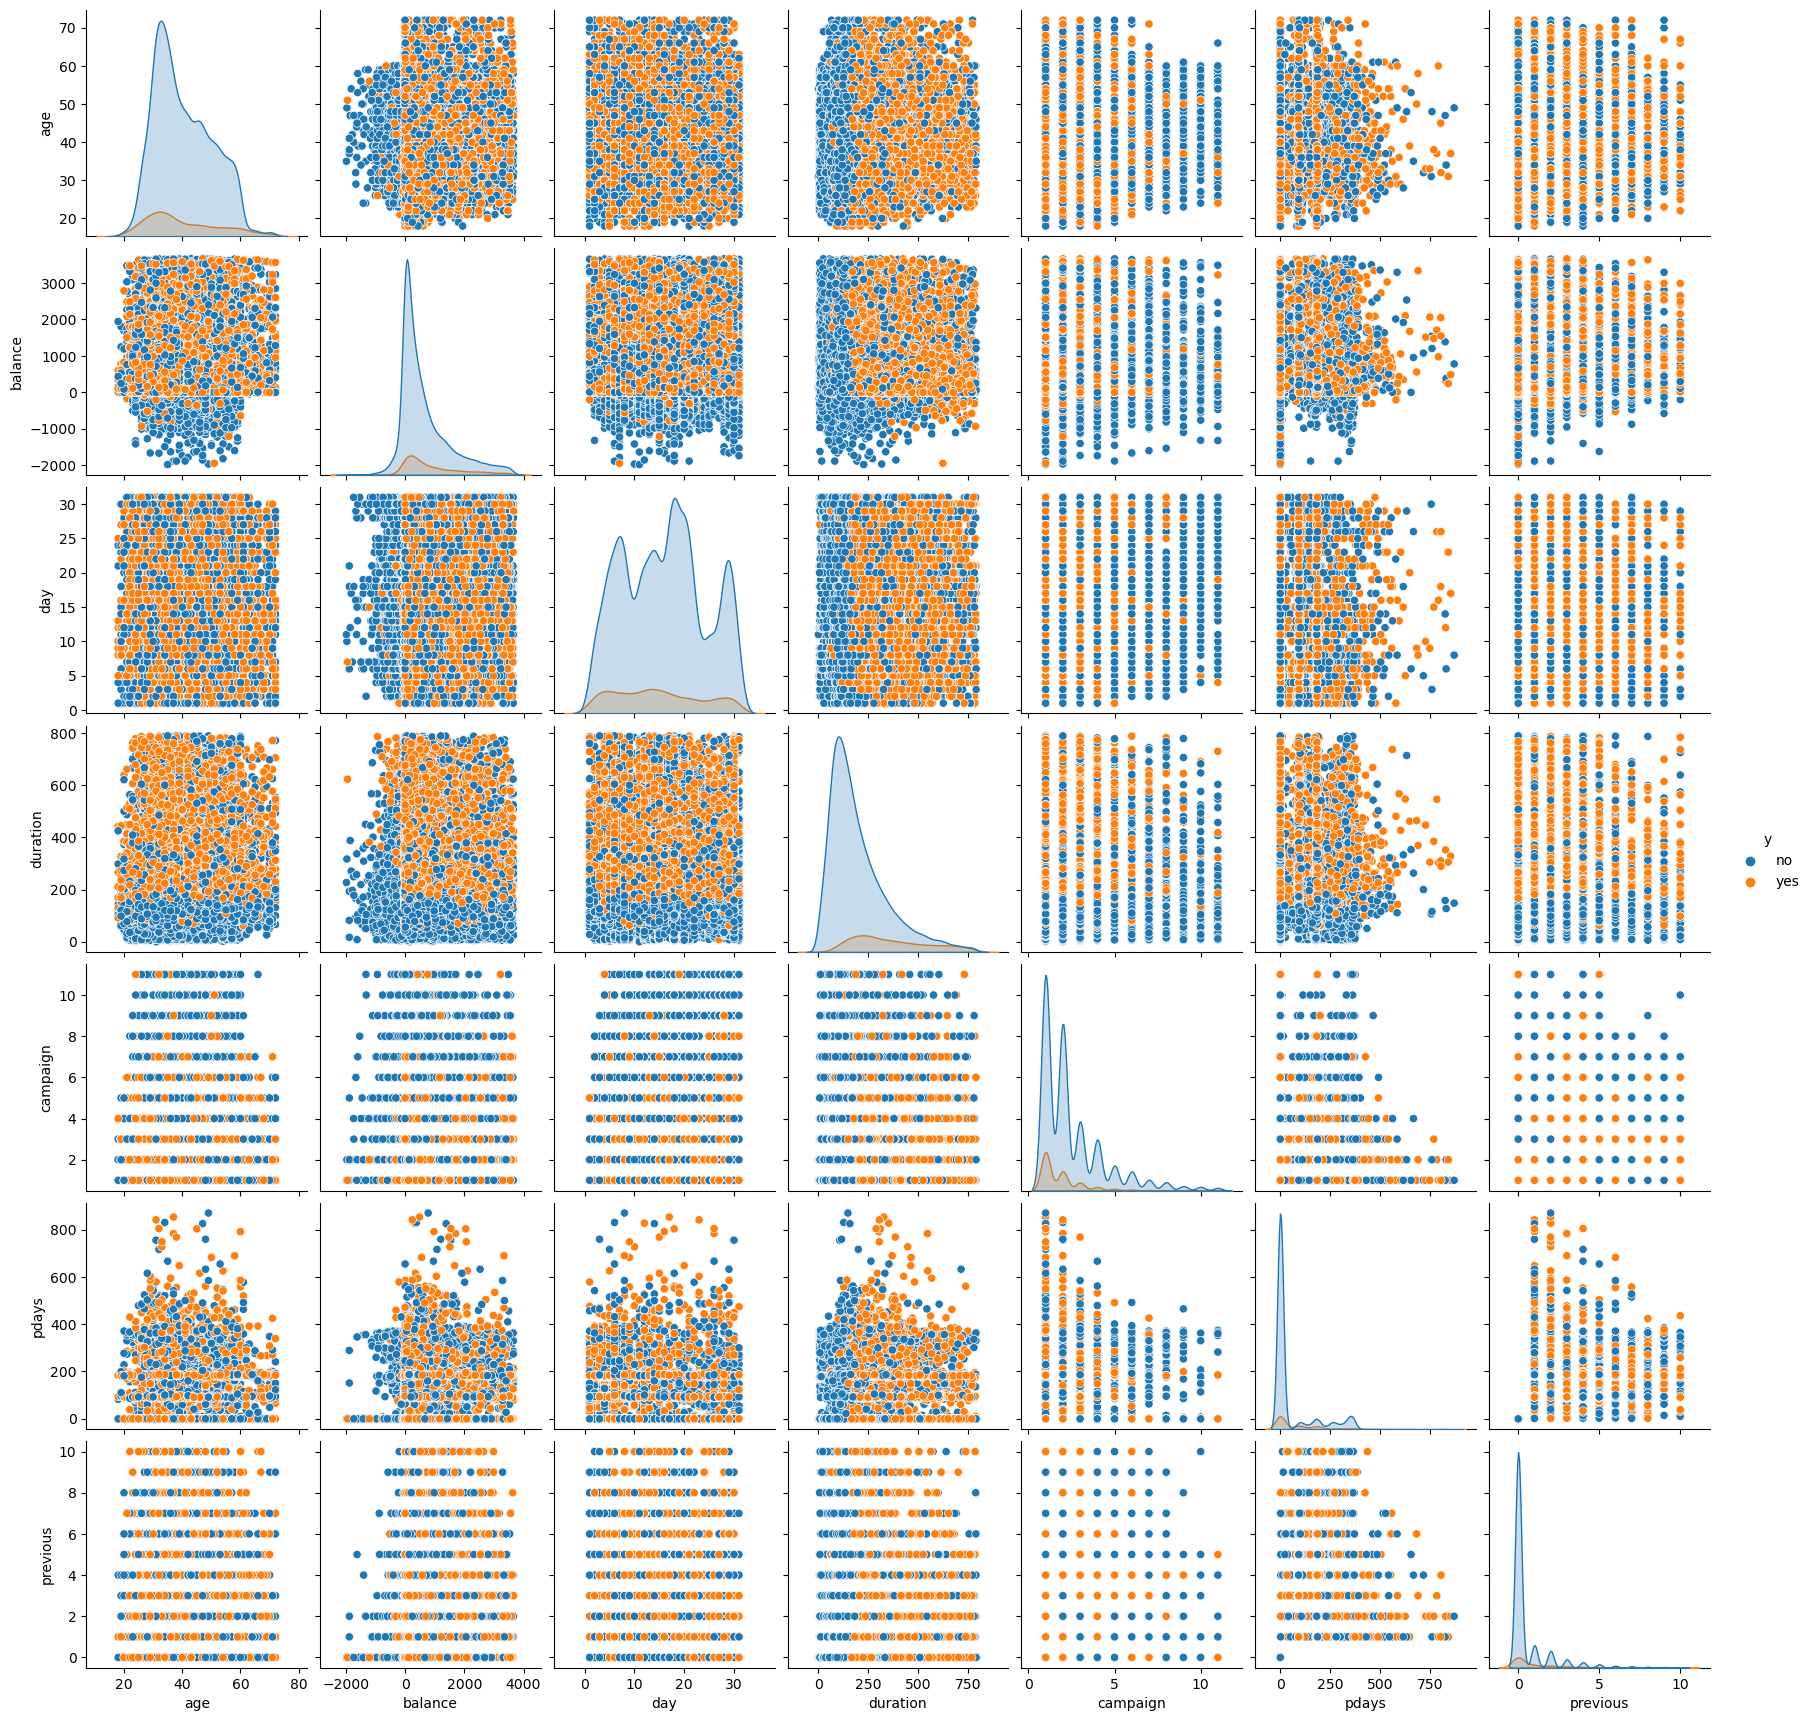

In [237]:
# Relationship between numerical variables

sns.pairplot(data=data,hue='y')
plt.show()

#- There is no column strongly related with one another all the columns are weakly related to each other  

<b>Potential Insights:</b>
- **Age vs Balance** : There is non-linear relationship between age and balance. Subscribers are more likely to have positive balance regardless of age. among subscribers, middle aged customers (between 40 to 50 years) tend to have higher balances.
- **Age Vs Duration** : Relationship is non linear. Subscriptions are strongly concentrated in cases with longer durations of calls (>300 to <500) seconds across all age groups.
middle aged customers (>40 to <50) tend to have longer calls leading to subscriptions.
- **Balance Vs Duration** : Relationship is non-linear. Subscriptions occur when balances are positive (>0) and durations are long (>300 seconds). Customers with high balances (>1000) are more likely to subscribe if the call duration is long.
- **Age Vs Campaign** : Non-linear negative relationship. Subscriptions are common in the first few campaigns(1-4), regardless of age. Middle aged customers (40 - 50 years) have higher subscription rates at lower campaign counts.
- **Balance Vs Campaign** : Relationship is non-linear. Positive balances and lower campaign counts(1-4) leads to subscriptions. Few subscriptions occur at higher campaign counts(>4) even for customers with high balances.

<b>Encoding</b>

In [240]:
data_category.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26502 entries, 12657 to 45209
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job        26502 non-null  object
 1   marital    26502 non-null  object
 2   education  26502 non-null  object
 3   default    26502 non-null  object
 4   housing    26502 non-null  object
 5   loan       26502 non-null  object
 6   contact    26502 non-null  object
 7   month      26502 non-null  object
 8   y          26502 non-null  object
dtypes: object(9)
memory usage: 2.0+ MB


In [38]:
data_encoded = pd.get_dummies(data, columns=['job', 'marital',  'default', 'housing', 'loan', 'contact'])

In [40]:
label_encoder = LabelEncoder()
data_encoded['y'] = label_encoder.fit_transform(data_encoded['y'])

In [42]:
data_encoded['month'] = label_encoder.fit_transform(data_encoded['month'])

In [44]:
data_encoded['education'] = label_encoder.fit_transform(data_encoded['education'])

In [46]:
pd.set_option('display.max_columns',None)

In [48]:
data_encoded

,age,education,balance,day,month,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone
12657,27,1,35,4,5,255,1,-1,0,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,True,False,True,False,True,False
12658,54,0,466,4,5,297,1,-1,0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False,True,False
12659,43,1,105,4,5,668,2,-1,0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,True,True,False
12660,31,1,19,4,5,65,2,-1,0,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,True,False,True,False,False,True
12661,27,1,126,4,5,436,4,-1,0,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45202,34,1,557,17,9,224,1,-1,0,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,True,False,True,False
45203,23,2,113,17,9,266,1,-1,0,1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,True,False,True,False,True,False
45205,25,1,505,17,9,386,2,-1,0,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,True,False,False,True,True,False
45207,71,0,1729,17,9,456,2,-1,0,1,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,True,False,True,False,True,False


In [50]:
data_encoded.drop('job_unknown',axis=1,inplace=True)

In [98]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26502 entries, 12657 to 45209
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                26502 non-null  int64
 1   education          26502 non-null  int64
 2   balance            26502 non-null  int64
 3   day                26502 non-null  int64
 4   month              26502 non-null  int64
 5   duration           26502 non-null  int64
 6   campaign           26502 non-null  int64
 7   pdays              26502 non-null  int64
 8   previous           26502 non-null  int64
 9   y                  26502 non-null  int64
 10  job_admin.         26502 non-null  bool 
 11  job_blue-collar    26502 non-null  bool 
 12  job_entrepreneur   26502 non-null  bool 
 13  job_housemaid      26502 non-null  bool 
 14  job_management     26502 non-null  bool 
 15  job_retired        26502 non-null  bool 
 16  job_self-employed  26502 non-null  bool 
 17  job_services 

In [52]:
data_encoded

,age,education,balance,day,month,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone
12657,27,1,35,4,5,255,1,-1,0,0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,True,False,True,False,True,False
12658,54,0,466,4,5,297,1,-1,0,0,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False,True,False
12659,43,1,105,4,5,668,2,-1,0,0,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,True,True,False
12660,31,1,19,4,5,65,2,-1,0,0,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,True,False,True,False,False,True
12661,27,1,126,4,5,436,4,-1,0,0,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45202,34,1,557,17,9,224,1,-1,0,1,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,True,False,True,False
45203,23,2,113,17,9,266,1,-1,0,1,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,True,False,True,False,True,False
45205,25,1,505,17,9,386,2,-1,0,1,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,True,False,False,True,True,False
45207,71,0,1729,17,9,456,2,-1,0,1,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,True,False,True,False,True,False


# <b>Splitting Data</b>

In [54]:
X = data_encoded.drop(columns=['y'])
y = data_encoded['y']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [56]:
X_train.shape, X_test.shape, X.shape, y_train.shape, y_test.shape, y.shape 

((18551, 31), (7951, 31), (26502, 31), (18551,), (7951,), (26502,))

### Sampling

In [254]:
# Before Sampling
print('"no" in " y" :',round((data_encoded['y'].value_counts()[0])/len(data['y']) * 100, 2),'%')
print('"Yes" in "y" :',round(data_encoded['y'].value_counts()[1]/len(data_encoded['y']) * 100,2),'%')

"no" in " y" : 87.96 %
"Yes" in "y" : 12.04 %


In [255]:
data_encoded['y'].value_counts()

y
0    23312
1     3190
Name: count, dtype: int64

In [58]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=123)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [60]:
resampled_data = pd.concat([X_resampled, pd.Series(y_resampled, name='y')], axis=1)

In [258]:
# After Sampling
print('"no" in " y" :',round((resampled_data['y'].value_counts()[0])/len(resampled_data['y']) * 100, 2),'%')
print('"Yes" in "y" :',round(resampled_data['y'].value_counts()[1]/len(resampled_data['y']) * 100,2),'%')

"no" in " y" : 50.0 %
"Yes" in "y" : 50.0 %


In [62]:
resampled_data['y'].value_counts()

y
0    23312
1    23312
Name: count, dtype: int64

In [260]:
resampled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46624 entries, 0 to 46623
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                46624 non-null  int64
 1   education          46624 non-null  int64
 2   balance            46624 non-null  int64
 3   day                46624 non-null  int64
 4   month              46624 non-null  int64
 5   duration           46624 non-null  int64
 6   campaign           46624 non-null  int64
 7   pdays              46624 non-null  int64
 8   previous           46624 non-null  int64
 9   job_admin.         46624 non-null  bool 
 10  job_blue-collar    46624 non-null  bool 
 11  job_entrepreneur   46624 non-null  bool 
 12  job_housemaid      46624 non-null  bool 
 13  job_management     46624 non-null  bool 
 14  job_retired        46624 non-null  bool 
 15  job_self-employed  46624 non-null  bool 
 16  job_services       46624 non-null  bool 
 17  job_student 

### splitting Resampled Data

In [64]:
# Separate features (X) and the target variable (y) from the resampled data

X_resampled = resampled_data.drop('y', axis=1)
y_resampled = resampled_data['y']

# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


# <b>Modeling</b>

### 1. Logistic Regression

In [149]:
# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict the target variable
y_pred = model.predict(X_test)

# Predict Probability, use for roc_curve and area under roc curve(roc_auc_score)
log_reg_probs = model.predict_proba(X_test)[:, 1] #[:,1] from entire X_test selecting column with index number 1(2nd Column)

Accuracy: 0.8030026809651475

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.81      4663
           1       0.81      0.79      0.80      4662

    accuracy                           0.80      9325
   macro avg       0.80      0.80      0.80      9325
weighted avg       0.80      0.80      0.80      9325



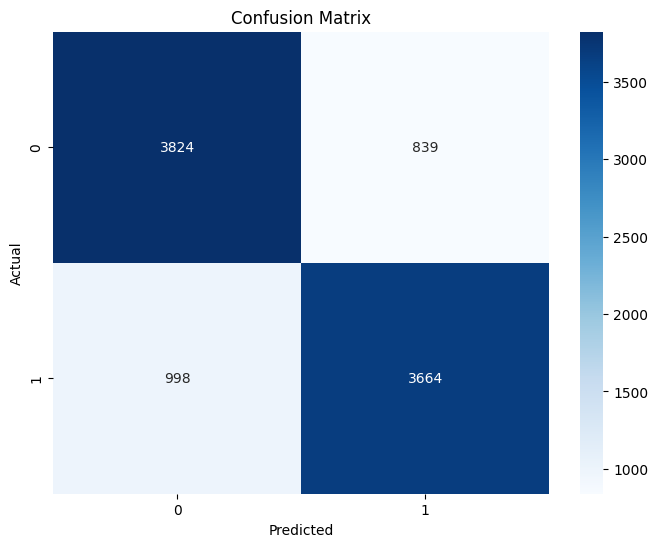


Confusion Matrix:
[[3824  839]
 [ 998 3664]]

AUC of ROC Score: 0.8783062036332463


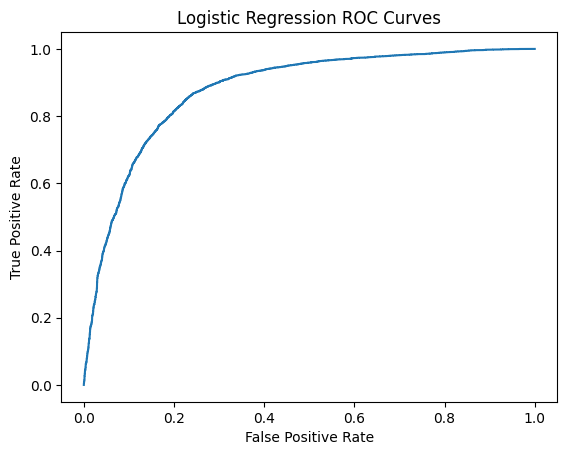

In [151]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

log_reg_fpr, log_reg_tpr, _ = roc_curve(y_test, log_reg_probs)
print('\nAUC of ROC Score:',roc_auc_score(y_test, log_reg_probs))
plt.plot(log_reg_fpr, log_reg_tpr, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_score(y_test, log_reg_probs)))
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Logistic Regression ROC Curves')
plt.savefig('log_roc.png')
plt.show()


### 2. Random Forest

In [154]:
#Initialize the model
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf_rf.fit(X_train, y_train)

#Predict the target variable
y_pred = clf_rf.predict(X_test)

# Predict Probability, use for roc_curve and area under roc curve(roc_auc_score)
rf_probs = clf_rf.predict_proba(X_test)[:, 1]

#### Evaluate Model Performance:


Accuracy: 0.9393029490616622

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      4663
           1       0.96      0.92      0.94      4662

    accuracy                           0.94      9325
   macro avg       0.94      0.94      0.94      9325
weighted avg       0.94      0.94      0.94      9325



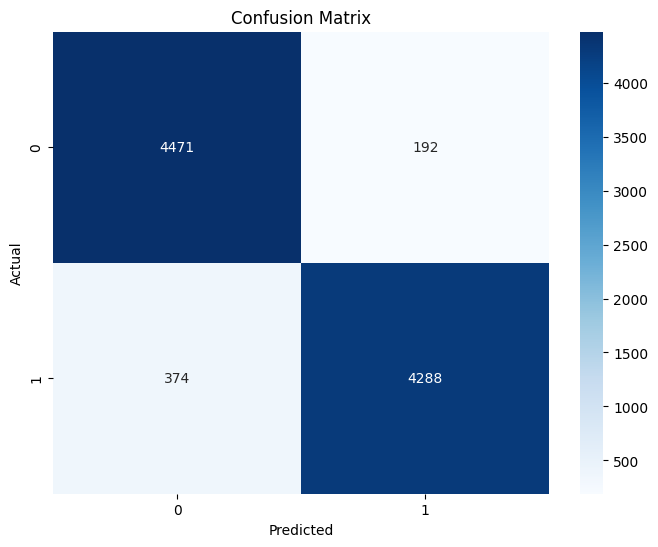


Confusion Matrix:
[[4471  192]
 [ 374 4288]]

AUC of ROC Score: 0.9867252979519759


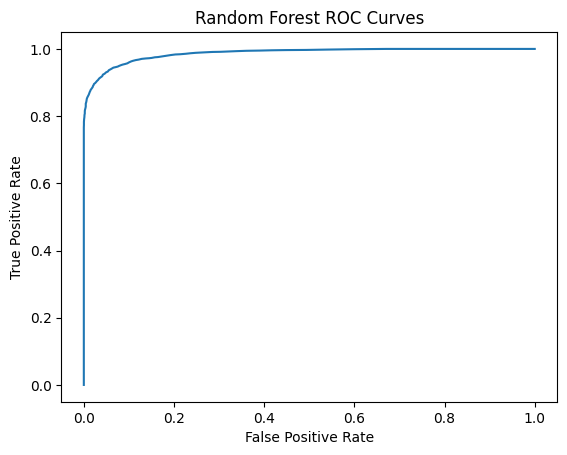

In [156]:
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
print('\nAUC of ROC Score:',roc_auc_score(y_test, rf_probs))
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = {:.2f})'.format(roc_auc_score(y_test, rf_probs)))
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Random Forest ROC Curves')
plt.savefig('rf_roc.png')
plt.show()

### 3.Decision Tree

In [158]:
#Initialize the model
clf_dt = DecisionTreeClassifier(random_state=42)

# Train the model
clf_dt.fit(X_train, y_train)

#predict the target variable
y_pred = clf_dt.predict(X_test)

# Predict Probability, use for roc_curve and area under roc curve(roc_auc_score)
dt_probs = clf_dt.predict_proba(X_test)[:, 1]


Accuracy: 0.9050938337801608

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      4663
           1       0.90      0.91      0.91      4662

    accuracy                           0.91      9325
   macro avg       0.91      0.91      0.91      9325
weighted avg       0.91      0.91      0.91      9325



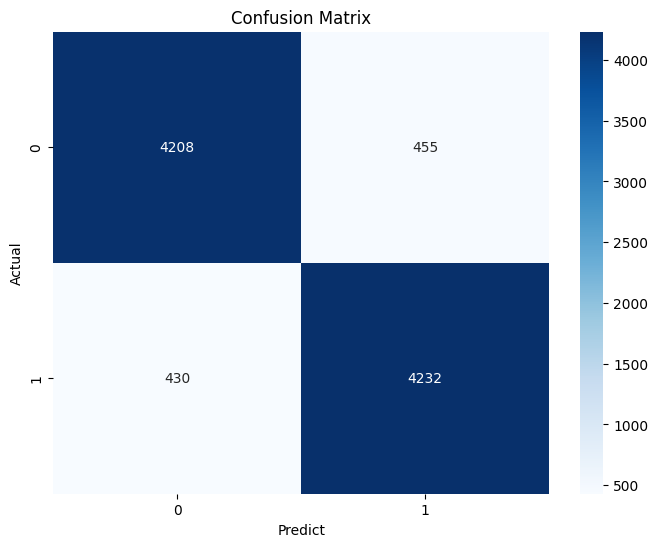


Confusion Matrix:
[[4208  455]
 [ 430 4232]]

AUC of ROC Score: 0.9050941201916969


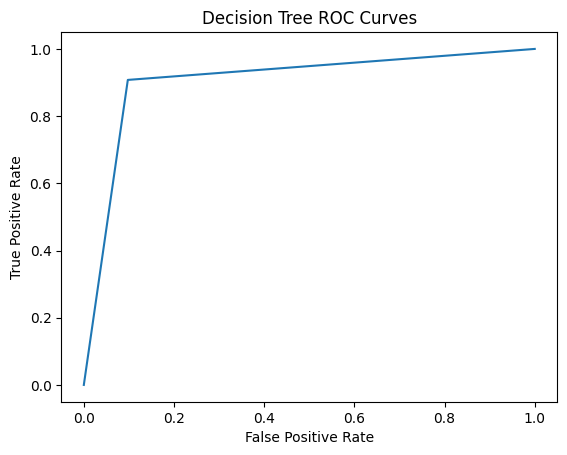

In [160]:
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, fmt='g',cmap='Blues')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

dt_fpr, dt_tpr, _ = roc_curve(y_test,dt_probs)
print('\nAUC of ROC Score:',roc_auc_score(y_test, dt_probs))
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (AUC = {:.2f})'.format(roc_auc_score(y_test, dt_probs)))
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Decision Tree ROC Curves')
plt.savefig('dt_roc.png')
plt.show()

### 4. XGboost

In [162]:
# Initialize the XGBoost classifier
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Train the model on the training data
clf_xgb.fit(X_train, y_train)

#predict the target variable
y_pred = clf_xgb.predict(X_test)

# Predict Probability, use for roc_curve and area under roc curve(roc_auc_score)
xgb_probs = clf_xgb.predict_proba(X_test)[:, 1]


Accuracy: 0.9389812332439679

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      4663
           1       0.95      0.92      0.94      4662

    accuracy                           0.94      9325
   macro avg       0.94      0.94      0.94      9325
weighted avg       0.94      0.94      0.94      9325



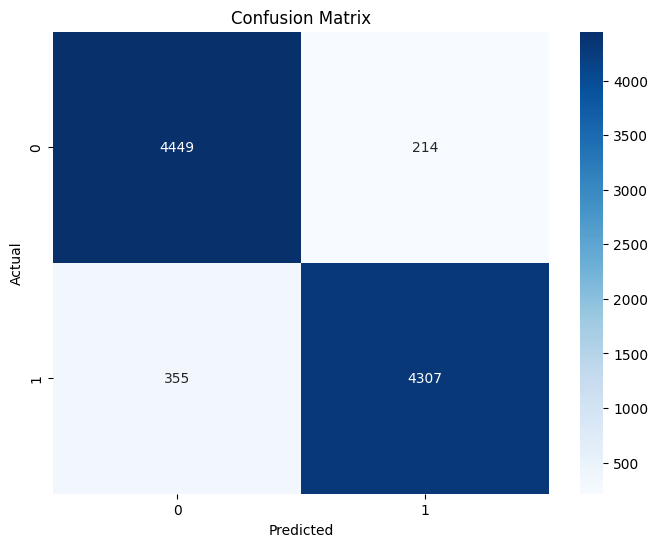


Confusion Matrix:
[[4449  214]
 [ 355 4307]]

AUC of ROC Score: 0.9863532691111503


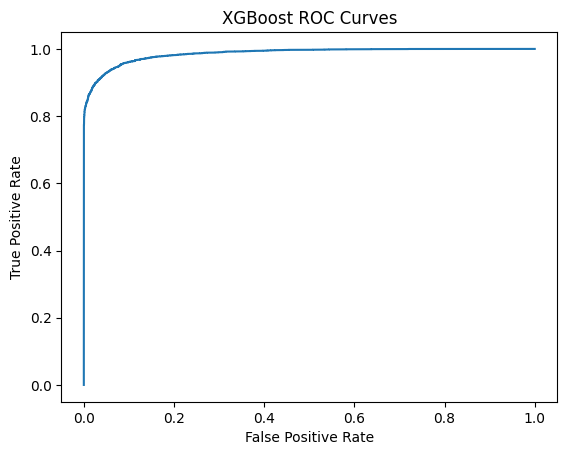

In [164]:
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
print('\nAUC of ROC Score:',roc_auc_score(y_test, xgb_probs))
plt.plot(xgb_fpr, xgb_tpr, label='XGBoost (AUC = {:.2f})'.format(roc_auc_score(y_test, xgb_probs)))
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('XGBoost ROC Curves')
plt.savefig('xgb_roc.png')
plt.show()

## ROC-AUC Score

In [141]:
#ROC-AUC Score of Logistic Regression
roc_auc_score(y_test, log_reg_probs)

0.8783062036332463

In [143]:
#ROC-AUC Score of Random Forest
roc_auc_score(y_test, rf_probs)

0.9867252979519759

In [145]:
#ROC-AUC Score of Decision Tree
roc_auc_score(y_test, dt_probs)

0.9050941201916969

In [147]:
#ROC-AUC Score of XGBoost
roc_auc_score(y_test, xgb_probs)

0.9863532691111503

## Feature Importance

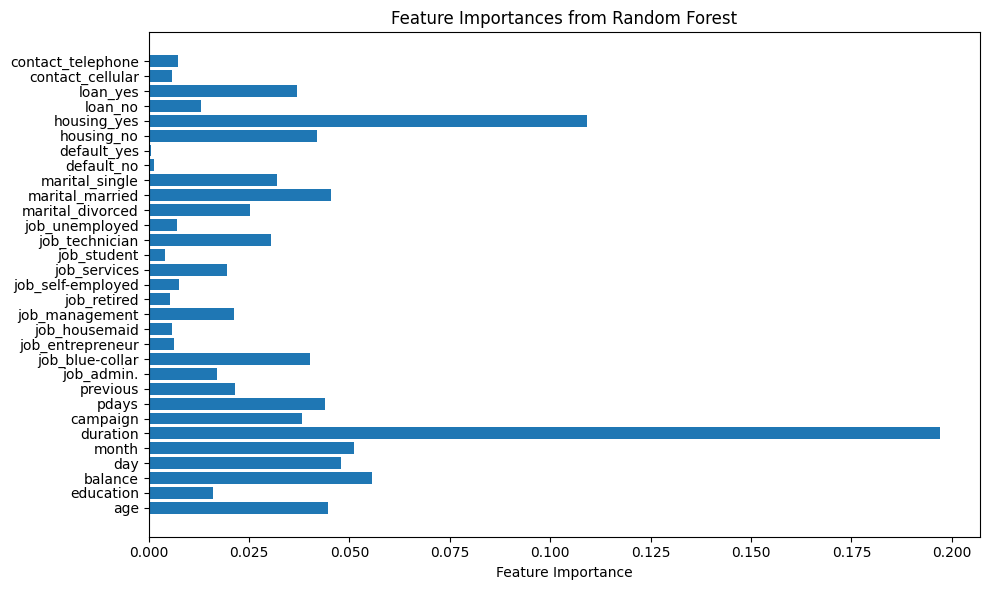

In [181]:
# Visualize feature importances 
importances = clf_rf.feature_importances_ 
feature_names = X.columns # X 

plt.figure(figsize=(10, 6)) 
plt.barh(range(len(importances)), importances, align='center') 
plt.yticks(range(len(importances)), feature_names) 
plt.xlabel('Feature Importance') 
plt.title('Feature Importances from Random Forest') 
plt.tight_layout() 
plt.savefig('feature_importances.png') 
plt.show()

## Recommendations and Insights

1. **Model Performance**:
   - **Logistic Regression**: Provides robust performance with high accuracy score.
   - **Random Forest**: Provides robust performance with high accuracy score.
   - **Decision Tree**: Performs similarly to Random Forest with little lower performance.
   - **Extreme Gradient Boosting**: Performs similarly to Random Forest with little higher variations.

2. **Feature Importance**:
   - The most important features influencing the prediction include **duration**, **age**, **balance**, and **campaign**.
   - Partial dependence plots indicate that longer call durations and higher balances are positively associated with subscription.

3. **Recommendations**:
   - Focus marketing efforts on clients with longer call durations and higher balances.
   - Tailor strategies based on important features to improve campaign effectiveness.
   - Continuously monitor and update the model to ensure its accuracy and relevance with new data.

